<a href="https://colab.research.google.com/github/luferIPCA/MIA-MLA-24-25/blob/main/4_Spliting_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for MLA course

by [*lufer*](mailto:lufer@ipca.pt)

(vers 2.0)

---



# ML Modelling - Part I

**Contents**:

1.  Spliting Datasets


## Environment preparation


### Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

Mounting Drive

In [3]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


In [ ]:
#check current pwd
#import os
#print(os.getcwd())

*Loading dataset*

In [34]:

import os
#print(os.getcwd())

filePath='//content/gDrive/MyDrive/Colab Notebooks/MIA - ML - 2024-2025/Datasets/'
ds = pd.read_csv(filePath+"heart-disease.csv")
#control decimal ooutputs
pd.set_option("display.precision", 2)

In [6]:
ds.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## 1 - Splitting a Dataset

Data splitting involves dividing a dataset into training, validation, and testing subsets.

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### *Check Missing values*

In [8]:
#check missing values
ds.isnull().sum()

#or
#n1 = ds.isnull().any(axis=1)
#n1
#answer: zero null values

#or
#ds.columns[ds.isnull().any()]

#or
#missing value counts in each of these columns
#miss = ds.isnull().sum()/len(ds)
#miss = ds[miss > 0]
#miss.sort_values(inplace=True)
#miss


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


### Visualizing the Dataset

Several examples

<Axes: title={'center': 'Total od Heart Desieses for Men in 20-40'}, xlabel='target'>

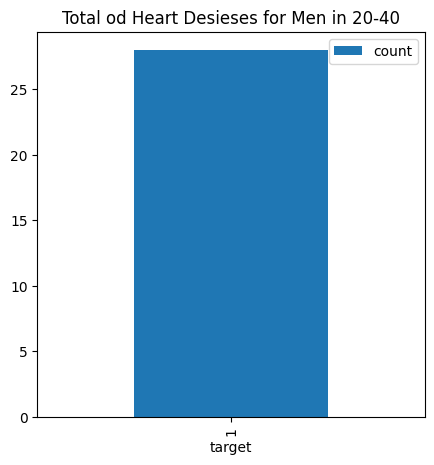

In [9]:
# total of heart deseases for men between 20 and 40
filter = ds.query("(age  <= 40) & (age >= 20) & (sex == 1) & target==1")['target'].value_counts()
filter.plot(kind='bar',figsize=(5,5), legend=True, title="Total od Heart Desieses for Men in 20-40")
#filter

In [ ]:
#see https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.02-Introducing-Scikit-Learn.ipynb#scrollTo=5IOss1GZkUrm
%matplotlib inline
dr=ds[(ds['age']>=20) & (ds['age']<40) & ds['sex']==1][['age','target']]
#check dr type
type(dr)
sns.pairplot(dr,hue='target', height=4,);

Text(0, 0.5, 'Number of Heart Desease')

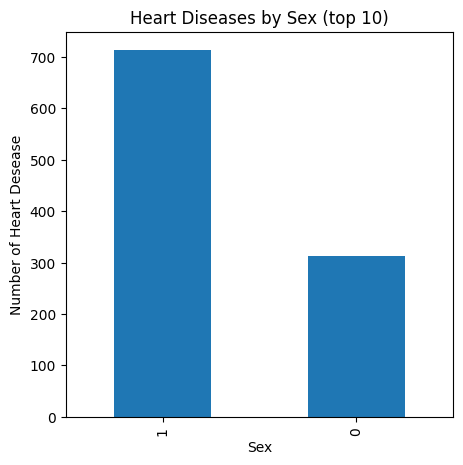

In [10]:
top_10 = ds['sex'].value_counts()[:10]
#or
#top_10 = ds['sex'].value_counts().head()

top_10.plot(kind='bar',figsize=(5,5))
plt.title('Heart Diseases by Sex (top 10)')
plt.xlabel('Sex')
plt.ylabel('Number of Heart Desease')

### Check correlation among all features

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(ds.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()

In [ ]:
# for each feature a distribution bar char
ds.hist(figsize=(12,12))
plt.show()


### Extracting the features matrix and target array

*Shuffle the original data*

In [35]:
# shuffle the DataFrame rows
dsc = ds.copy()
dsc= dsc.sample(frac = 1)   #frac=1 means 100%, random, suffle
dsc.head(5)

#compare with initial dataset
#ds.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
345,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
384,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
438,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
472,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1


*Features Matrix*

1. Main features (matrix)
2. Target Feature (Label | Categorial Target) (column)


In [14]:
#Steps

#1 - Dvide the data into features (X) and labels (y)

#dataframe with all features variables
X_dsc = ds.drop('target', axis=1)   # use all columns except the target one
#or
#X_dsc = ds['target']

#analyse
X_dsc.shape
#X_dsc

(1025, 13)

*Target array*

'y' labels

In [ ]:
#who has target >0
#dsc_t=dsc.target[dsc.target> 0]
#dsc_t

In [36]:
#2 - Get dependent feature (target)
# Series with the target value (dependent feature)
y_dsc = dsc['target']         # we want to predict y using X
y_dsc.shape
#y_dsc

(1025,)

*Split*

In [20]:
#library to split our data into train and test sets
#train, test = train_test_split(dataset, ...)

#Note: random_state is a hyperparameter
# random_state=none - the function generate different datasets in each execution.
#                     we get different train and test sets across different executions
# random_state=40 - (like seed) the function generate the same datatsets

#1 - Split the dataset: tes=25%; training=75%
# test size=25%
X_train, X_test, y_train, y_test = train_test_split(X_dsc,y_dsc,test_size=0.25,random_state=40)
#or
# train size=80%
#X_train, X_test, y_train, y_test=train_test_split(X_dsc,y_dsc,train_size=0.8,random_state=40)


In [21]:
# Train dataset (75%)
X_train
# 75%
print(len(X_train)*100/len(dsc))

74.92682926829268


In [22]:
X_train.shape

(768, 13)

In [23]:
# Test dataset (25%)
X_test.shape
# 25%
print(len(X_test)*100/len(dsc))

25.073170731707318


In [24]:
y_train

,target
15,1
289,0
95,1
266,0
777,0
...,...
286,1
466,1
1005,0
567,1


In [25]:
y_test

,target
373,0
827,0
811,0
737,0
524,0
...,...
910,0
425,0
921,0
422,1


## Stratifying Datasets

Stratified train-test split

Split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

Split without stratify

In [33]:
X_dsc = ds.drop('target', axis=1)   # use all columns except the target one
y_dsc = dsc['target']     #target columns
#X_dsc.shape

(1025, 13)

In [37]:
from collections import Counter
#split again
X_train, X_test, y_train, y_test=train_test_split(X_dsc,y_dsc,test_size=0.5,random_state=40)

#Counter() - from collection modules - counts the occurrences of each unique value
print(f"y_dsc: {Counter(y_dsc)}")
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")
# Analysis:
# train and test dataset have significantly  different number of samples

y_dsc: Counter({1: 526, 0: 499})
y_train: Counter({1: 269, 0: 243})
y_test: Counter({1: 257, 0: 256})


In [ ]:
len(dsc)

1025

Split with stratification

In [38]:
#split again with stratification
X_train, X_test, y_train, y_test=train_test_split(X_dsc,y_dsc,test_size=0.5,random_state=40, stratify=y_dsc)
print(Counter(y_dsc))
print(Counter(y_train))
print(Counter(y_test))
# Analysis:
# train and test dataset have almost the same samples

Counter({1: 526, 0: 499})
Counter({1: 263, 0: 249})
Counter({1: 263, 0: 250})


End!